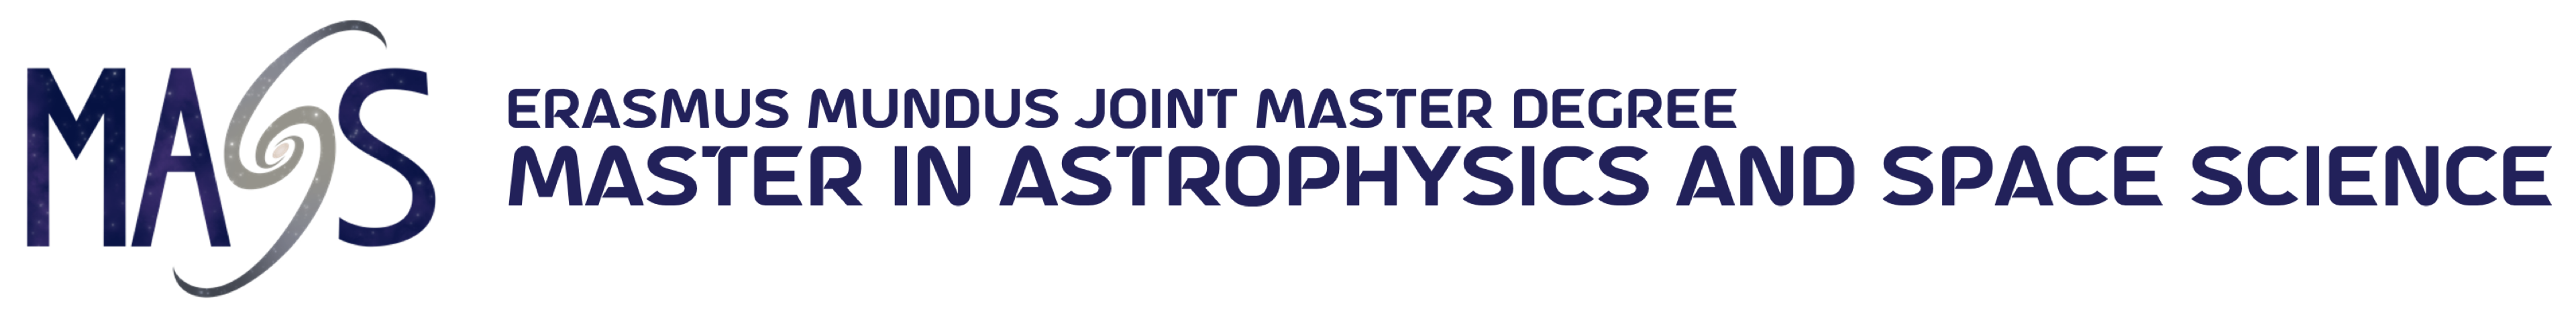

# AGNs Tutorial 3: Cloudy.exe

10 May 2024

Student: Francesca Borg

Instructor: Prof. Dragana Ilic

## Q.1

**Plot spectrum of PNe for different abundances and discuss why we see differences in spectra.**

The following code was run on cloudy.exe to find planetary nebula abundances.

```
blackbody, T=1e5 K #the continuum shape
luminosity total 38 #the luminosity in log erg s-1
radius 18 #the log of the inner radius in cm
hden 5 #the log of the H density cm-3
sphere
abundances planetary nebula
save overview "pn_abundances.ovr"
save continuum "pn_abundances.con" units microns last
```
ExecTime(s) 40.13

And to find solar abundance spectra:

```
blackbody, T=1e5 K #the continuum shape
luminosity total 38 #the luminosity in log erg s-1
radius 18 #the log of the inner radius in cm
hden 5 #the log of the H density cm-3
sphere
save overview "solar_abundances.ovr"
save continuum "solar_abundances.con" units microns last
```
ExecTime(s) 46.05

In [1]:
#import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import timeit

In [2]:
#read results
plan=pd.read_csv('pn_abundances.con', header=0, sep='\t')
sol=pd.read_csv('solar_abundances.con', header=0, sep='\t')

In [3]:
plan

,#Cont nu,incident,trans,DiffOut,net trans,reflc,total,reflin,outlin,lineID,cont,nLine
0,2.992930e+07,1.711000e+12,0.0,3.103000e+26,3.103000e+26,0.0,3.103000e+26,0.0,0.0,,,0.0
1,2.982970e+07,1.728000e+12,0.0,3.138000e+26,3.138000e+26,0.0,3.138000e+26,0.0,0.0,,,0.0
2,2.973040e+07,1.745000e+12,0.0,3.173000e+26,3.173000e+26,0.0,3.173000e+26,0.0,0.0,,,0.0
3,2.963150e+07,1.763000e+12,0.0,3.208000e+26,3.208000e+26,0.0,3.208000e+26,0.0,0.0,,,0.0
4,2.953290e+07,1.781000e+12,0.0,3.243000e+26,3.243000e+26,0.0,3.243000e+26,0.0,0.0,,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9239,1.461500e-08,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,,,0.0
9240,1.418420e-08,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,,,0.0
9241,1.376600e-08,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,,,0.0
9242,1.336010e-08,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,,,0.0


In [4]:
sol

,#Cont nu,incident,trans,DiffOut,net trans,reflc,total,reflin,outlin,lineID,cont,nLine
0,2.992930e+07,1.711000e+12,0.0,2.136000e+26,2.136000e+26,0.0,2.136000e+26,0.0,0.0,,,0.0
1,2.982970e+07,1.728000e+12,0.0,2.159000e+26,2.159000e+26,0.0,2.159000e+26,0.0,0.0,,,0.0
2,2.973040e+07,1.745000e+12,0.0,2.182000e+26,2.182000e+26,0.0,2.182000e+26,0.0,0.0,,,0.0
3,2.963150e+07,1.763000e+12,0.0,2.205000e+26,2.205000e+26,0.0,2.205000e+26,0.0,0.0,,,0.0
4,2.953290e+07,1.781000e+12,0.0,2.229000e+26,2.229000e+26,0.0,2.229000e+26,0.0,0.0,,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9239,1.461500e-08,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,,,0.0
9240,1.418420e-08,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,,,0.0
9241,1.376600e-08,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,,,0.0
9242,1.336010e-08,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,,,0.0


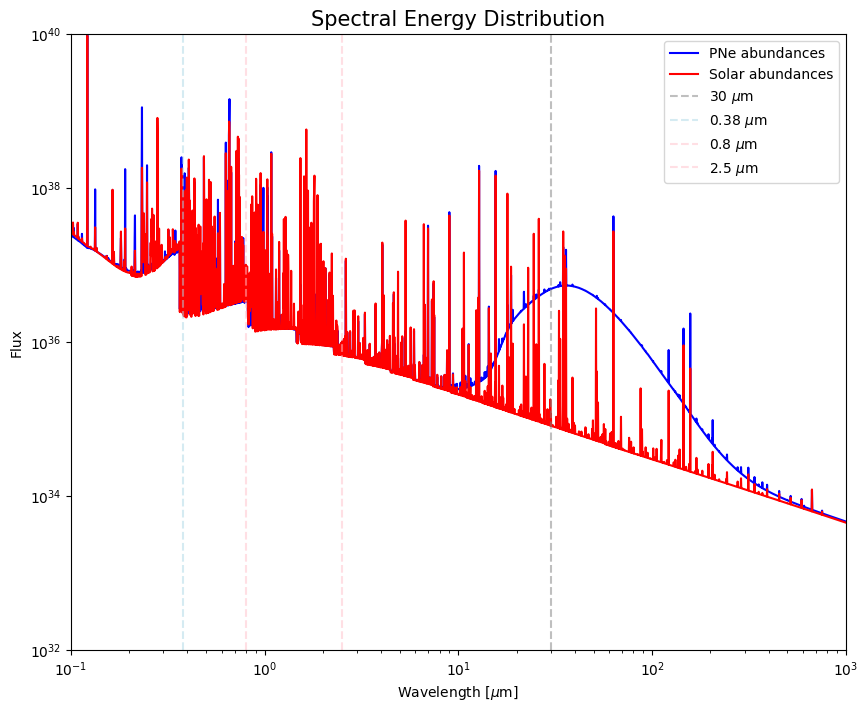

In [5]:
fig = plt.figure(figsize=(10,8))
plt.title('Spectral Energy Distribution', fontsize=15)
plt.xlabel(r'Wavelength [$\mu$m]')
plt.ylabel('Flux')
plt.plot(plan['#Cont  nu'], plan['net trans'], label='PNe abundances', color='blue') #note : DOUBLE SPACING in #Cont  nu
plt.plot(sol['#Cont  nu'], sol['net trans'], label='Solar abundances', color = 'red')
plt.axvline(x=30, label = r'30 $\mu$m', ls='--', color='gray', alpha=0.5)
plt.axvline(x=0.38, label = r'0.38 $\mu$m', ls='--', color='lightblue', alpha=0.5)
plt.axvline(x=0.8, label = r'0.8 $\mu$m', ls='--', color='pink', alpha=0.5)
plt.axvline(x=2.5, label = r'2.5 $\mu$m', ls='--', color='pink', alpha=0.5)
#plt.fill_betweenx(plan['net trans'], 0.38, 0.8)

plt.loglog()

plt.xlim(0.1, 1000)
plt.ylim(1e32, 1e40)

plt.legend()

fig.savefig('Fig1_spectra.png')

Note the bump around 30 $\mu$m in the spectra for the planetary nebula. This emission feature is caused by the dust in the nebula being warmed by light from the central star.

Cliff-like features in the visible (0.38 - 0.7 $\mu$m) and near-IR (0.8 - 2.5 $\mu$m) wavelengths are produced by recombination continua.

The emission lines are produced by both recombination and collisional excitation.

## Q.2

**Perform a simulation of the Broad-Line Region (BLR) cloud for 3 different ionization flux (vary 0.5 dex).**

**Plot and compare the spectrum in the range 0.1-10 $\mu$m, but also in the optical band.**

The following code was run on cloudy.exe

```
table power law
phi(H) 18.5
hden 10
stop column density 22
iterate to convergence
print last iteration
save overview "blr.ovr" last
save continuum "blr.con" units microns last
```

ExecTime(s) 352.23

This code was re-run with alternative ionization fluxes `phi(H) = 18`

```
table power law
phi(H) 18
hden 10
stop column density 22
iterate to convergence
print last iteration
save overview "blr2.ovr" last
save continuum "blr2.con" units microns last
```

ExecTime(s) 251.26

and `phi(H) = 19`.

```
table power law
phi(H) 19
hden 10
stop column density 22
iterate to convergence
print last iteration
save overview "blr3.ovr" last
save continuum "blr3.con" units microns last
```

ExecTime(s) 408.81

The different spectra are plotted below for visual comparison.

In [6]:
#load the data
blr1=pd.read_csv('blr.con', header=0, sep='\t')
blr2=pd.read_csv('blr2.con', header=0, sep='\t')
blr3=pd.read_csv('blr3.con', header=0, sep='\t')

In [7]:
blr1

,#Cont nu,incident,trans,DiffOut,net trans,reflc,total,reflin,outlin,lineID,cont,nLine
0,2.992930e+07,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,,,0.0
1,2.982970e+07,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,,,0.0
2,2.973040e+07,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,,,0.0
3,2.963150e+07,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,,,0.0
4,2.953290e+07,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9239,1.461500e-08,40620.0,40620.0,0.0,40620.0,3.382,40620.0,0.0,0.0,,,0.0
9240,1.418420e-08,39430.0,39420.0,0.0,39420.0,3.198,39420.0,0.0,0.0,,,0.0
9241,1.376600e-08,38260.0,38260.0,0.0,38260.0,3.025,38260.0,0.0,0.0,,,0.0
9242,1.336010e-08,37140.0,37130.0,0.0,37130.0,2.860,37130.0,0.0,0.0,,,0.0


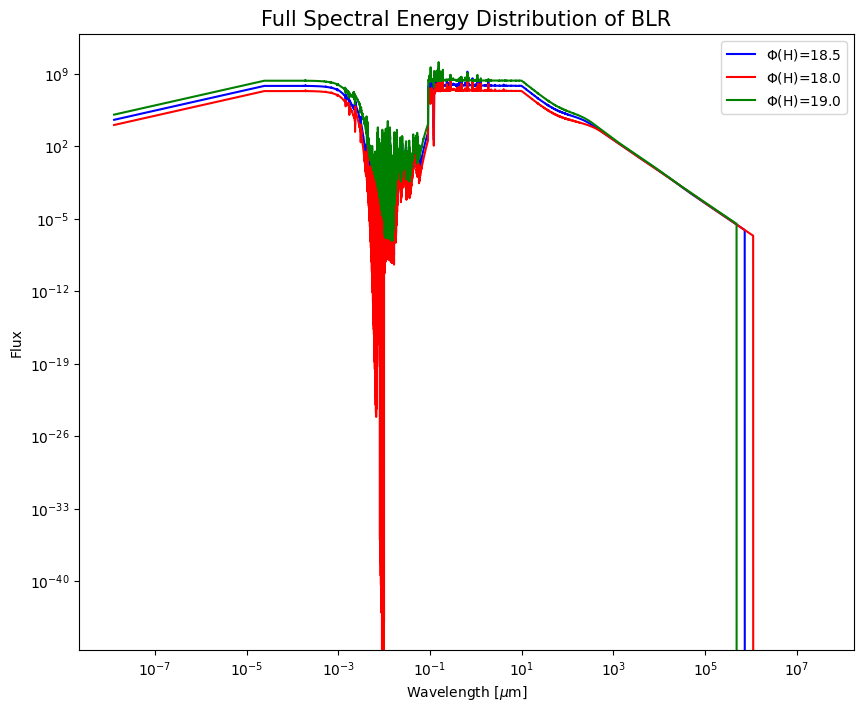

In [8]:
#plot and compare all 3 results

fig = plt.figure(figsize=(10,8))
plt.title('Full Spectral Energy Distribution of BLR', fontsize=15)
plt.xlabel(r'Wavelength [$\mu$m]')
plt.ylabel('Flux')
plt.plot(blr1['#Cont  nu'], blr1['net trans'], label=r'$\Phi$(H)=18.5', color='blue') #note : DOUBLE SPACING in #Cont  nu
plt.plot(blr2['#Cont  nu'], blr2['net trans'], label=r'$\Phi$(H)=18.0', color = 'red')
plt.plot(blr3['#Cont  nu'], blr3['net trans'], label=r'$\Phi$(H)=19.0', color = 'green')

plt.loglog()

plt.legend()

fig.savefig('Fig2_blr_spectra.png')

Looking more closely in the range 0.1-10 $\mu$m:

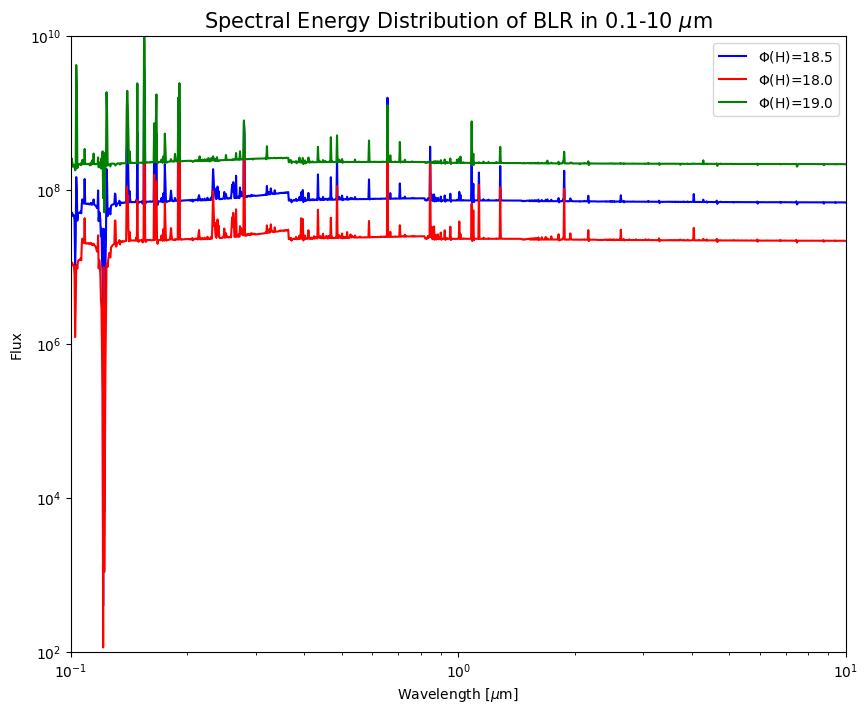

In [9]:
fig = plt.figure(figsize=(10,8))
plt.title(r'Spectral Energy Distribution of BLR in 0.1-10 $\mu$m', fontsize=15)
plt.xlabel(r'Wavelength [$\mu$m]')
plt.ylabel('Flux')
plt.plot(blr1['#Cont  nu'], blr1['net trans'], label=r'$\Phi$(H)=18.5', color='blue') #note : DOUBLE SPACING in #Cont  nu
plt.plot(blr2['#Cont  nu'], blr2['net trans'], label=r'$\Phi$(H)=18.0', color = 'red')
plt.plot(blr3['#Cont  nu'], blr3['net trans'], label=r'$\Phi$(H)=19.0', color = 'green')

plt.loglog()

plt.xlim(0.1, 10)
plt.ylim(1e2, 1e10)

plt.legend()

fig.savefig('Fig2_blr_spectra_1.png')

Looking now at the optical band (0.38-0.70 $\mu$m):

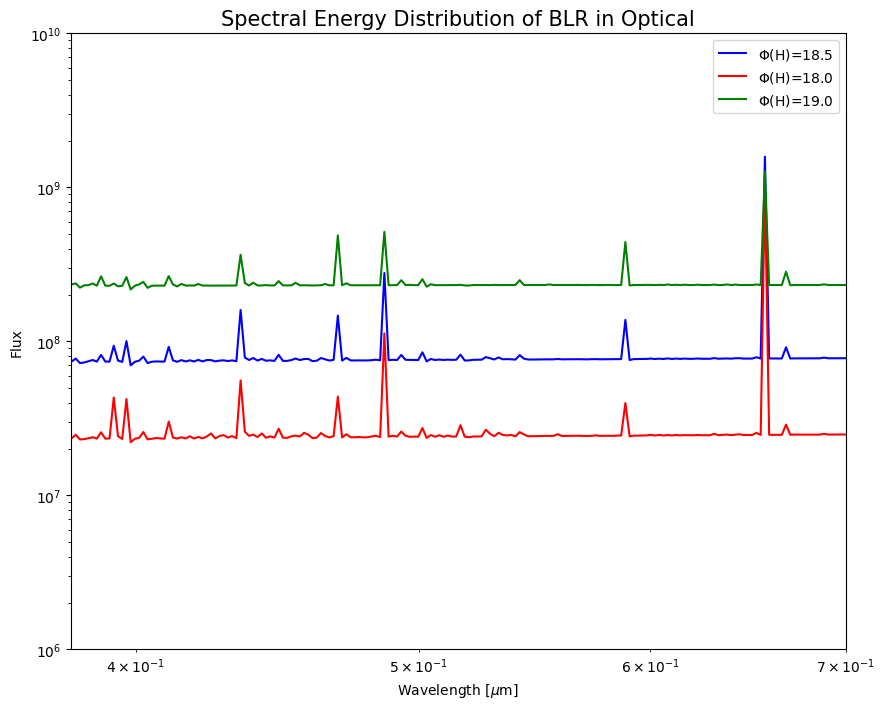

In [10]:
fig = plt.figure(figsize=(10,8))
plt.title('Spectral Energy Distribution of BLR in Optical', fontsize=15)
plt.xlabel(r'Wavelength [$\mu$m]')
plt.ylabel('Flux')
plt.plot(blr1['#Cont  nu'], blr1['net trans'], label=r'$\Phi$(H)=18.5', color='blue') #note : DOUBLE SPACING in #Cont  nu
plt.plot(blr2['#Cont  nu'], blr2['net trans'], label=r'$\Phi$(H)=18.0', color = 'red')
plt.plot(blr3['#Cont  nu'], blr3['net trans'], label=r'$\Phi$(H)=19.0', color = 'green')

plt.loglog()

plt.xlim(0.38, 0.7) #optical band
plt.ylim(1e6, 1e10)

plt.legend()

fig.savefig('Fig2_blr_spectra_2.png')

## Q.3

**Plot the temperature of the PNe from the overview file, i.e. the distance from the center (1st col.) vs. gas temperature (2nd col.).**

In [11]:
#read in overview file from Q.1
plan_ov=pd.read_csv('pn_abundances.ovr', header=0, sep='\t')

In [12]:
plan_ov

,#depth,Te,Htot,hden,eden,2H_2/H,HI,HII,HeI,HeII,...,O1,O2,O3,O4,O5,O6,H2O/O,AV(point),AV(extend),Tau912
0,8.639050e+09,10531.0,4.091000e-14,100000.0,96421.0,2.774700e-10,0.13720,0.862800,0.10185,0.859180,...,0.16027,0.820000,1.971800e-02,1.040400e-05,1.175500e-36,1.175500e-36,1.212800e-19,9.320000e-07,6.950000e-07,0.001500
1,5.183430e+10,10527.0,4.067000e-14,100000.0,96009.0,2.761700e-10,0.13644,0.863560,0.10148,0.859390,...,0.15939,0.820740,1.985400e-02,1.052900e-05,1.175500e-36,1.175500e-36,1.181500e-19,4.660000e-06,3.470000e-06,0.007468
2,2.246150e+11,10516.0,4.041000e-14,100000.0,95965.0,2.759800e-10,0.13588,0.864120,0.10163,0.859280,...,0.15875,0.821290,1.994600e-02,1.059600e-05,1.175500e-36,1.175500e-36,1.164100e-19,1.960000e-05,1.460000e-05,0.031241
3,9.157390e+11,10492.0,3.974000e-14,100000.0,96010.0,2.771100e-10,0.13526,0.864740,0.10244,0.858730,...,0.15806,0.821910,2.001700e-02,1.057900e-05,1.175500e-36,1.175500e-36,1.146800e-19,7.920000e-05,5.910000e-05,0.125900
4,2.187410e+12,10411.0,3.775000e-14,100000.0,96523.0,2.690800e-10,0.12881,0.871190,0.10354,0.857940,...,0.15061,0.828100,2.128400e-02,1.163500e-05,1.175500e-36,1.175500e-36,9.757700e-20,1.570000e-04,1.170000e-04,0.243100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,4.238370e+14,4227.0,6.520000e-17,100000.0,1041.4,6.568700e-06,0.99264,0.007349,0.97791,0.021954,...,0.99425,0.005743,1.729200e-08,1.175500e-36,1.175500e-36,1.175500e-36,7.683900e-12,2.290000e-02,1.710000e-02,216.590000
147,4.255150e+14,4165.7,6.436000e-17,100000.0,1033.1,7.326100e-06,0.99270,0.007289,0.97813,0.021731,...,0.99430,0.005692,1.700500e-08,1.175500e-36,1.175500e-36,1.175500e-36,9.439200e-12,2.300000e-02,1.710000e-02,217.630000
148,4.271370e+14,4105.0,6.356000e-17,100000.0,1025.2,8.170500e-06,0.99276,0.007232,0.97835,0.021521,...,0.99435,0.005643,1.673700e-08,1.175500e-36,1.175500e-36,1.175500e-36,1.161900e-11,2.310000e-02,1.720000e-02,218.630000
149,4.287070e+14,4044.7,6.280000e-17,100000.0,1017.7,9.112200e-06,0.99281,0.007177,0.97855,0.021324,...,0.99439,0.005597,1.648700e-08,1.175500e-36,1.175500e-36,1.175500e-36,1.432800e-11,2.320000e-02,1.730000e-02,219.600000


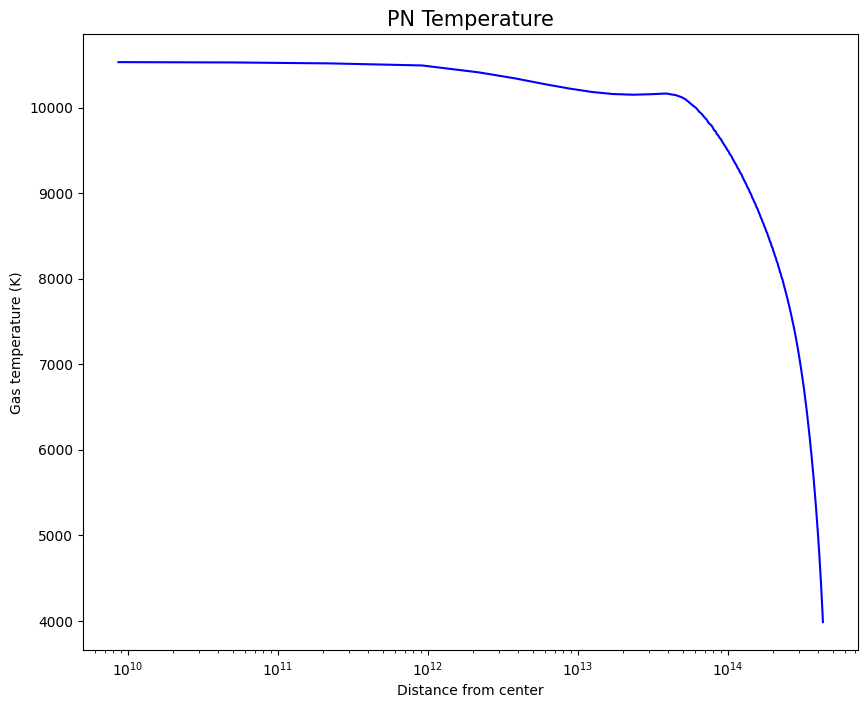

In [13]:
#plot temperature as a function of distance from center
fig = plt.figure(figsize=(10,8))
plt.title('PN Temperature', fontsize=15)
plt.xlabel(r'Distance from center')
plt.ylabel('Gas temperature (K)')
plt.plot(plan_ov['#depth'], plan_ov['Te'], color='blue')
plt.semilogx()
#plt.loglog()

#plt.xlim(0, 5e14)
#plt.ylim(1e34, 1e40)

fig.savefig('Fig3_PN_temp.png')